# Гордионок М8О-209Б-19


## №1

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
def der_x(f, x):
    eps = 0.0001
    return (f(x + eps) - f(x)) / eps

def our_max(f, x0, step, eps, i=1000):
    points = [[x0, f(x0)]]
    x = x0
    while i and abs(f(x)) > eps:
        x += der_x(f, x) * step
        points.append([x, f(x)])
        i -= 1
    
    return x, points # points - список точек, по которым пробежал алгоритм

def our_min(f, x0, step, eps, i=1000):
    points = [[x0, f(x0)]]
    x = x0
    while i and abs(f(x)) > eps:
        x -= der_x(f, x) * step
        points.append([x, f(x)])
        i -= 1
    
    return x, points # points - список точек, по которым пробежал алгоритм

def our_root(f, x0, step, eps, i = 2000):
    x, prev = x0 + step, x0
    points = [[x0, f(x0)]]
    while abs(f(x) - f(prev)) > eps and i:
        points.append([x, f(x)])
        if abs(f(x)) > abs(f(prev)):
            step = -step / 5
            
        prev, x = x, x + step
        i -= 1
        
    return x, points

Максимум [6.00867420848499, 56.00438477359148]
Минимум [11.722560554469965, -919.8851823673031]
Корень 7.000002048000001


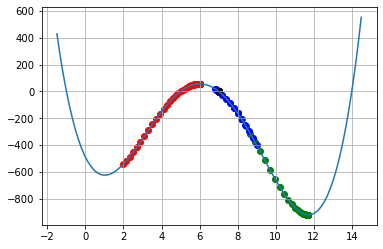

In [146]:
f = lambda x: x**4 - 25*x**3 + 177*x**2 - 287*x - 490

eps = 0.0001

maxf, max_list = our_max(f, 2, 0.001, eps, i = 100)
minf, min_list = our_min(f, 8, 0.001, eps, i = 100)
root, root_list = our_root(f, 8, 1, eps)

x_list = np.linspace(-1.5, 14.5, 100)
y_list = [f(x) for x in x_list]


plt.grid(True)
plt.plot(x_list, y_list)

for point in max_list:
    plt.scatter(point[0], point[1], c='r')

for point in min_list:
    plt.scatter(point[0], point[1], c='g') 
    
for point in root_list:
    plt.scatter(point[0], point[1], c='b') 
    
point = root_list.pop()
plt.scatter(point[0], point[1], c='black') 
    
print('Максимум', max_list.pop())
print('Минимум', min_list.pop())
print('Корень', root)
# Зеленые - минимум, красные - максимум


Просто график, с нормальными осями (в matplotlib только сетка)

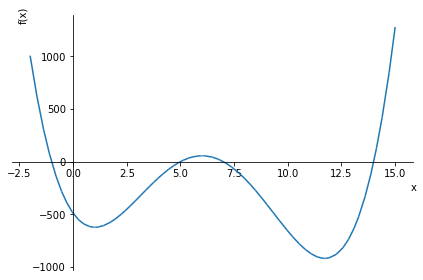

Корни:  [-sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3))/2 - sqrt(-2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3) - 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 1851/(4*sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3))) + 153/2)/2 + 25/4, -sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3))/2 + sqrt(-2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3) - 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 1851/(4*sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3))) + 153/2)/2 + 25/4, sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) + 2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3))/2 + 25/4 - sqrt(-2*(7*sqrt(7166116635)/72 + 36909/2)**(1/3) - 7783/(6*(7*sqrt(7166116635)/72 + 36909/2)**(1/3)) - 1851/(4*sqrt(153/4 + 7783/(6*(7*sqrt(7166116635)/72 + 36909/

In [147]:
import sympy as sym

x = sym.Symbol('x')
f = sym.sympify('x**4 - 25*x**3 + 177*x**2 - 28*x - 490')


sym.plot(x**4 - 25*x**3 + 177*x**2 - 287*x - 490, (x, -2, 15)) 

root = sym.solve(f, x)
func_deriv = sym.diff(f, x, 1)
ext = sym.solve(f, x)

print('Корни: ', root)
print('Экстремумы: ', ext)

## №2 

In [148]:
def der_xy(f, x):
    eps = 0.0001
    return ([((f([x[0] + eps, x[1]]) - f(x)) / eps), ((f([x[0], x[1] + eps]) - f(x)) / eps)])

def our_max2d(f, x0, step, eps, i=1000):
    points = [[x0[0], x0[1], f(x0)]]
    x = x0
    while i and abs(f(x)) > eps:
        point = der_xy(f, x)
        x[0] += point[0] * step
        x[1] += point[1] * step
        points.append([x[0], x[1], f(x)])
        i -= 1
    
    return x, points # points - список точек, по которым пробежал алгоритм

def our_min2d(f, x0, step, eps, i=1000):
    points = [[x0[0], x0[1], f(x0)]]
    x = x0
    while i and abs(f(x)) > eps:
        point = der_xy(f, x)
        x[0] -= point[0] * step
        x[1] -= point[1] * step
        points.append([x[0], x[1], f(x)])
        i -= 1
    
    return x, points # points - список точек, по которым пробежал алгоритм

Минимум [9.372114917258436, -31.92639241701979, -111.56967843339154]


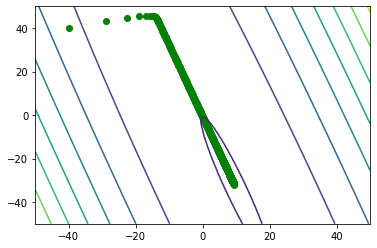

In [149]:
# F = lambda x, y: 10*x**2 + 6*x*y + y**2 + 4*x + 8*y + 4
F = lambda x: 10*x[0]**2 + 6*x[0]*x[1] + x[1]**2 + 4*x[0] + 8*x[1] + 4

x, y = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
z = F([x, y])

# maxf, max_list = our_max2d(F, [25, 25], 0.02, eps, i = 1000)
minf, min_list = our_min2d(F, [-40, 40], 0.02, eps, i = 1000)

fig = plt.contour(x, y, z)


# for point in max_list:
#     plt.scatter(point[0], point[1], c='r')

for point in min_list:
    plt.scatter(point[0], point[1], c='g') 
    
# print('Максимум', max_list.pop())
print('Минимум', min_list.pop())